<a href="https://colab.research.google.com/github/raf-esc/alura_challenge_data_science_2/blob/main/semana_1/alura_challenge_data_science_2_semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alura - Challenge Data Science 2 - Semana 1

## 1ª Tarefa - Preparar o Ambiente e Carregar a Base de Dados

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=b54b6375199e3094e7006bcc02373732b79b71c486a7356f46d7b50313ed33f8
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.types import IntegerType, DoubleType, StringType

In [3]:
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [4]:
df = spark.read.json('/content/drive/MyDrive/Alura/Challenge - Data Science 2')

## 2ª Tarefa - Explorar a base de dados utilizando recursos do PySpark

In [5]:
df.show(10)

+--------------------+--------------------+--------------------+
|             anuncio|             imagens|             usuario|
+--------------------+--------------------+--------------------+
|{0, [], [16], [0]...|[{39d6282a-71f3-4...|{9d44563d-3405-4e...|
|{0, [], [14], [0]...|[{23d2b3ab-45b0-4...|{36245be7-70fe-40...|
|{0, [1026], [1026...|[{1da65baa-368b-4...|{9dc415d8-1397-4d...|
|{0, [120], [120],...|[{79b542c6-49b4-4...|{9911a2df-f299-4a...|
|{0, [3], [3], [0]...|[{e2bc497b-6510-4...|{240a7aab-12e5-40...|
|{0, [20], [15], [...|[{2de09d46-dc0d-4...|{3c7057f5-0923-42...|
|{3, [43], [43], [...|[{147a80d9-cd40-4...|{5a9736b5-aaa0-4a...|
|{2, [42], [42], [...|[{35740004-063d-4...|{ec48d96a-137c-49...|
|{0, [], [12], [0]...|[{6d3d2aec-c96f-4...|{dad7db63-e19c-44...|
|{1, [41], [41], [...|[{3d404069-418e-4...|{a845f35f-3ab3-46...|
+--------------------+--------------------+--------------------+
only showing top 10 rows



In [6]:
df.printSchema()

root
 |-- anuncio: struct (nullable = true)
 |    |-- andar: long (nullable = true)
 |    |-- area_total: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- area_util: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- banheiros: array (nullable = true)
 |    |    |-- element: long (containsNull = true)
 |    |-- caracteristicas: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- endereco: struct (nullable = true)
 |    |    |-- bairro: string (nullable = true)
 |    |    |-- cep: string (nullable = true)
 |    |    |-- cidade: string (nullable = true)
 |    |    |-- estado: string (nullable = true)
 |    |    |-- latitude: double (nullable = true)
 |    |    |-- longitude: double (nullable = true)
 |    |    |-- pais: string (nullable = true)
 |    |    |-- rua: string (nullable = true)
 |    |    |-- zona: string (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-

In [7]:
print(f'Número de registros no dataframe inicial: {df.count()}.')

Número de registros no dataframe inicial: 89083.


## 3ª Tarefa - Transformar cada campo da coluna "anuncio" em uma coluna separada

Nossa base de dados possui 3 campos principais:

- anuncio

- imagens

- usuario

Para nossa análise, apenas as informações do campo "anuncio" serão relevantes. Por isso, vamos focar em analisar as colunas desse campo.

Dicionário de dados:

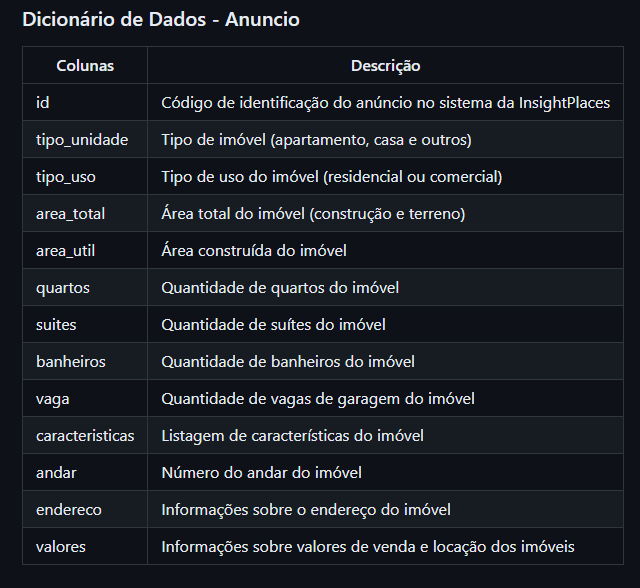

[fonte](https://github.com/millenagena/Challenge-Data-Science-Alura-2ed/blob/main/1-Transformando-os-dados/dados/README.md#dicion%C3%A1rio-de-dados---anuncio)

In [8]:
df_anuncios = df.select('anuncio.*')

In [9]:
df_anuncios.show(10)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    0|        []|     [16]|      [0]|                  []|{Centro, 20061003...|47d553e0-79f2-4a4...|    [0]|   [0]|       Usado|      Outros|  Comercial| [1]|[{260, 107, Venda...|
|    0|        []|     [14]|      [0]|                  []|{Centro, 20051040...|b6ffbae1-17f6-487...|    [0]|    []|       Usado|      Outros|  Comercial| [0]|[{260, 107, Venda...|
|    0|    [1026]|   [1026]|      [0]|                  []|{Maria da Graça, ...|1fb030a5-9e3e-4

## 4ª Tarefa - Filtrar a base de dados

O time de Data Science solicitou que fizéssemos alguns filtros nas colunas tipo_uso, tipo_unidade e tipo_anuncio da nossa base de dados:

- tipo_uso: Residencial;

- tipo_unidade: Apartamento;

- tipo_anuncio: Usado.

In [10]:
df_anuncios.select('tipo_uso').groupBy('tipo_uso')\
.agg(f.count('tipo_uso').alias('contagem')).orderBy('contagem').show()

df_anuncios.select('tipo_unidade').groupBy('tipo_unidade')\
.agg(f.count('tipo_unidade').alias('contagem')).orderBy('contagem').show()

df_anuncios.select('tipo_anuncio').groupBy('tipo_anuncio')\
.agg(f.count('tipo_anuncio').alias('contagem')).orderBy('contagem').show()

+-----------+--------+
|   tipo_uso|contagem|
+-----------+--------+
|  Comercial|    4542|
|Residencial|   84541|
+-----------+--------+

+------------+--------+
|tipo_unidade|contagem|
+------------+--------+
|        Casa|   10319|
|      Outros|   11963|
| Apartamento|   66801|
+------------+--------+

+------------+--------+
|tipo_anuncio|contagem|
+------------+--------+
|  Lançamento|     256|
|       Usado|   88827|
+------------+--------+



In [11]:
df_filtrado = df_anuncios.filter('tipo_uso == "Residencial"')\
.filter('tipo_unidade == "Apartamento"').filter('tipo_anuncio == "Usado"')

df_filtrado.show(10)

print(f'Número de registros no dataframe após filtragem: {df_filtrado.count()}.')

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|      [43]|     [43]|      [1]|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{245, NULL, Vend...|
|    2|      [42]|     [42]|      [1]|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{0, 0, Venda, 15...|
|    1|      [41]|     [41]|      [1]|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

In [12]:
df_filtrado.printSchema()

root
 |-- andar: long (nullable = true)
 |-- area_total: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- area_util: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- banheiros: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- endereco: struct (nullable = true)
 |    |-- bairro: string (nullable = true)
 |    |-- cep: string (nullable = true)
 |    |-- cidade: string (nullable = true)
 |    |-- estado: string (nullable = true)
 |    |-- latitude: double (nullable = true)
 |    |-- longitude: double (nullable = true)
 |    |-- pais: string (nullable = true)
 |    |-- rua: string (nullable = true)
 |    |-- zona: string (nullable = true)
 |-- id: string (nullable = true)
 |-- quartos: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- suites: array (nullable = true)
 |    |-- element: long (c

## 5ª Tarefa - Transformar as colunas dos cômodos dos imóveis de listas para inteiros

Como pessoas engenheiras de dados, nós queremos entregar a base de dados de forma mais estruturada para que o time de ciência de dados possa realizar os tratamentos e criação do modelo de machine learning.

Nesse contexto, transforme os dados das colunas "quartos", "suites", "banheiros", "vaga", "area_total" e "area_util" de listas para inteiros.

In [13]:
lista_colunas_comodos = ['area_total', 'area_util', 'banheiros', 'quartos',
                         'suites', 'vaga']

for coluna in lista_colunas_comodos:
  df_filtrado.select(coluna)\
  .withColumn('tamanho_array_' + coluna, f.size(df_filtrado[coluna]))\
  .groupBy('tamanho_array_' + coluna)\
  .agg(f.count('tamanho_array_' + coluna).alias('contagem')).show()

+------------------------+--------+
|tamanho_array_area_total|contagem|
+------------------------+--------+
|                       1|   57368|
|                       0|    9194|
+------------------------+--------+

+-----------------------+--------+
|tamanho_array_area_util|contagem|
+-----------------------+--------+
|                      1|   66562|
+-----------------------+--------+

+-----------------------+--------+
|tamanho_array_banheiros|contagem|
+-----------------------+--------+
|                      1|   66562|
+-----------------------+--------+

+---------------------+--------+
|tamanho_array_quartos|contagem|
+---------------------+--------+
|                    1|   66562|
+---------------------+--------+

+--------------------+--------+
|tamanho_array_suites|contagem|
+--------------------+--------+
|                   1|   61008|
|                   0|    5554|
+--------------------+--------+

+------------------+--------+
|tamanho_array_vaga|contagem|
+-----------

In [14]:
df_convertido = df_filtrado\
.withColumn('area_total', df_filtrado['area_total'][0].cast(IntegerType()))\
.withColumn('area_util', df_filtrado['area_util'][0].cast(IntegerType()))\
.withColumn('banheiros', df_filtrado['banheiros'][0].cast(IntegerType()))\
.withColumn('quartos', df_filtrado['quartos'][0].cast(IntegerType()))\
.withColumn('suites', df_filtrado['suites'][0].cast(IntegerType()))\
.withColumn('vaga', df_filtrado['vaga'][0].cast(IntegerType()))

df_convertido.show(10)
df_convertido.printSchema()

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  NULL|       Usado| Apartamento|Residencial|   1|[{245, NULL, Vend...|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  NULL|       Usado| Apartamento|Residencial|   1|[{0, 0, Venda, 15...|
|    1|        41|       41|        1|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

## 6ª Tarefa - Tratamento de informações sobre localização

A equipe de ciência de dados nos solicitou que apenas as informações sobre bairro e zona da cidade fossem extraídas.

Então, vamos analisar a coluna endereco e transformar apenas as informações sobre bairro e zona em colunas de nosso DataFrame.

In [15]:
df_com_localizacao = df_convertido\
.withColumn('bairro', df_convertido['endereco']['bairro'])\
.withColumn('zona', df_convertido['endereco']['zona'])

df_com_localizacao.show(10)
df_com_localizacao.printSchema()

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+---------+----------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|   bairro|      zona|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+---------+----------+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  NULL|       Usado| Apartamento|Residencial|   1|[{245, NULL, Vend...|Paciência|Zona Oeste|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  NULL|       Usado| Apartamento|Residencial|   1|[{0, 0, Venda, 15...|Paciência|Zo

In [16]:
df_com_localizacao_sem_endereco = df_com_localizacao.drop('endereco')

df_com_localizacao_sem_endereco.show(10)
df_com_localizacao_sem_endereco.printSchema()

+-----+----------+---------+---------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+---------+----------+
|andar|area_total|area_util|banheiros|     caracteristicas|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|   bairro|      zona|
+-----+----------+---------+---------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+---------+----------+
|    3|        43|       43|        1|[Academia, Churra...|d2e3a3aa-09b5-45a...|      2|  NULL|       Usado| Apartamento|Residencial|   1|[{245, NULL, Vend...|Paciência|Zona Oeste|
|    2|        42|       42|        1|[Churrasqueira, P...|085bab2c-87ad-452...|      2|  NULL|       Usado| Apartamento|Residencial|   1|[{0, 0, Venda, 15...|Paciência|Zona Oeste|
|    1|        41|       41|        1|[Portaria 24h, Co...|18d22cbe-1b86-476...|      2|  NULL|

## 7ª Tarefa - Transformar cada campo da coluna "valores" em uma coluna separada

Pensando em simplificar a compreensão dos dados para as pessoas cientistas de dados, vamos entender a estrutura da coluna valores que é a mais importante da base de dados.

root

 |-- valores: array (nullable = true)

 |    |-- element: struct (containsNull = true)

 |    |    |-- condominio: string (nullable = true)

 |    |    |-- iptu: string (nullable = true)

 |    |    |-- tipo: string (nullable = true)

 |    |    |-- valor: string (nullable = true)

Podemos observar que os valores são do tipo array, ou seja, uma lista que contém elementos. Estes elementos são dicionários com as informações de condominio, iptu, tipo, e valor

Nesse contexto, transforme os dados da coluna valores em colunas separadas.

In [17]:
df_com_localizacao_sem_endereco\
.select('valores')\
.withColumn('tamanho_array_valores',
            f.size(df_com_localizacao_sem_endereco['valores']))\
.groupBy('tamanho_array_valores')\
.agg(f.count('tamanho_array_valores').alias('contagem')).show()

+---------------------+--------+
|tamanho_array_valores|contagem|
+---------------------+--------+
|                    1|   65941|
|                    2|     621|
+---------------------+--------+



In [18]:
df_com_localizacao_sem_endereco.count()

66562

In [19]:
df_valores = df_com_localizacao_sem_endereco\
.select(['id', f.explode('valores').alias('valores')])

df_valores.show(10)
print(f'Número de registros no dataframe de valores: {df_valores.count()}.')

+--------------------+--------------------+
|                  id|             valores|
+--------------------+--------------------+
|d2e3a3aa-09b5-45a...|{245, NULL, Venda...|
|085bab2c-87ad-452...|{0, 0, Venda, 15000}|
|18d22cbe-1b86-476...|{0, 0, Venda, 20000}|
|bed8a354-9317-442...|{285, NULL, Venda...|
|12a13315-d67f-48f...|{245, NULL, Venda...|
|a2e6d7a5-0ff0-484...|{285, NULL, Venda...|
|a6e3173b-c950-4db...|{250, NULL, Venda...|
|2e6e5dfb-206c-496...|{245, NULL, Venda...|
|99f8d0f9-95a4-461...|{245, NULL, Venda...|
|b3f44c1a-2d50-4d5...|{240, NULL, Venda...|
+--------------------+--------------------+
only showing top 10 rows

Número de registros no dataframe de valores: 67183.


In [20]:
df_valores = df_valores\
.withColumn('condominio', df_valores['valores']['condominio'].cast(DoubleType()))\
.withColumn('iptu', df_valores['valores']['iptu'].cast(DoubleType()))\
.withColumn('tipo_valor', df_valores['valores']['tipo'])\
.withColumn('valor', df_valores['valores']['valor'].cast(DoubleType()))\
.drop('valores')

df_valores.show(10)
print(f'Número de registros no dataframe de valores: {df_valores.count()}.')

+--------------------+----------+----+----------+-------+
|                  id|condominio|iptu|tipo_valor|  valor|
+--------------------+----------+----+----------+-------+
|d2e3a3aa-09b5-45a...|     245.0|NULL|     Venda|15000.0|
|085bab2c-87ad-452...|       0.0| 0.0|     Venda|15000.0|
|18d22cbe-1b86-476...|       0.0| 0.0|     Venda|20000.0|
|bed8a354-9317-442...|     285.0|NULL|     Venda|20000.0|
|12a13315-d67f-48f...|     245.0|NULL|     Venda|15000.0|
|a2e6d7a5-0ff0-484...|     285.0|NULL|     Venda|20000.0|
|a6e3173b-c950-4db...|     250.0|NULL|     Venda|15000.0|
|2e6e5dfb-206c-496...|     245.0|NULL|     Venda|15000.0|
|99f8d0f9-95a4-461...|     245.0|NULL|     Venda|15000.0|
|b3f44c1a-2d50-4d5...|     240.0|NULL|     Venda|17999.0|
+--------------------+----------+----+----------+-------+
only showing top 10 rows

Número de registros no dataframe de valores: 67183.


In [21]:
df_completo = df_com_localizacao_sem_endereco\
.join(df_valores, 'id', how = 'inner').drop('valores')

df_completo.show(10)
print(f'Número de registros no dataframe com valores separados: {df_completo.count()}.')

df_completo.printSchema()

+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+------+----------+--------+
|                  id|andar|area_total|area_util|banheiros|     caracteristicas|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|              bairro|        zona|condominio|  iptu|tipo_valor|   valor|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+------+----------+--------+
|03a386b6-7ab8-4ef...|    0|        43|       43|        1|[Churrasqueira, A...|      2|  NULL|       Usado| Apartamento|Residencial|   1|            Realengo|  Zona Oeste|     285.0|  NULL|     Venda| 22999.0|
|1fe78d41-b8e0-4d2...|    0|        44|       44|        1|                  []|      2|     0|       Usado| Apartamento|Residencial|   0|               Ira

## 8ª Tarefa - Tratamento para a coluna de valores

A InsightPlaces permite que o(a) anunciante crie um anúncio com duas opções de valor. Assim, o(a) cliente pode criar um anúncio que mostre tanto o valor de venda do imóvel quanto o seu valor de locação, juntamente com os valores de taxa de condomínio (quando houver) e taxa de IPTU. Estes valores são diferenciados pelo campo tipo que pode assumir os valores Venda e Aluguel.

Como se trata de um estudo sobre o preço de venda dos imóveis, o time de cientistas de dados solicitou apenas as informações do tipo VENDA.

Selecione apenas os valores de Venda.

In [22]:
df_final = df_completo.filter('tipo_valor == "Venda"')

df_final.show(10)
print(f'Número de registros no dataframe após última filtragem: {df_final.count()}.')

+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+------+----------+--------+
|                  id|andar|area_total|area_util|banheiros|     caracteristicas|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|              bairro|        zona|condominio|  iptu|tipo_valor|   valor|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+------+----------+--------+
|03a386b6-7ab8-4ef...|    0|        43|       43|        1|[Churrasqueira, A...|      2|  NULL|       Usado| Apartamento|Residencial|   1|            Realengo|  Zona Oeste|     285.0|  NULL|     Venda| 22999.0|
|1fe78d41-b8e0-4d2...|    0|        44|       44|        1|                  []|      2|     0|       Usado| Apartamento|Residencial|   0|               Ira

In [23]:
df_final.printSchema()

root
 |-- id: string (nullable = true)
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- tipo_valor: string (nullable = true)
 |-- valor: double (nullable = true)



## 9ª Tarefa - Salvar os dados no formato parquet

In [24]:
df_final.write\
.parquet('/content/drive/MyDrive/Alura/Challenge - Data Science 2/parquet', mode = 'overwrite')

## 10ª Tarefa - Salvar o arquivo no formato csv

In [25]:
df_para_conversao_em_csv = df_final.withColumn('caracteristicas', df_final['caracteristicas'].cast(StringType()))
df_para_conversao_em_csv.show(10)

+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+------+----------+--------+
|                  id|andar|area_total|area_util|banheiros|     caracteristicas|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|              bairro|        zona|condominio|  iptu|tipo_valor|   valor|
+--------------------+-----+----------+---------+---------+--------------------+-------+------+------------+------------+-----------+----+--------------------+------------+----------+------+----------+--------+
|03a386b6-7ab8-4ef...|    0|        43|       43|        1|[Churrasqueira, A...|      2|  NULL|       Usado| Apartamento|Residencial|   1|            Realengo|  Zona Oeste|     285.0|  NULL|     Venda| 22999.0|
|1fe78d41-b8e0-4d2...|    0|        44|       44|        1|                  []|      2|     0|       Usado| Apartamento|Residencial|   0|               Ira

In [26]:
df_para_conversao_em_csv.printSchema()

root
 |-- id: string (nullable = true)
 |-- andar: long (nullable = true)
 |-- area_total: integer (nullable = true)
 |-- area_util: integer (nullable = true)
 |-- banheiros: integer (nullable = true)
 |-- caracteristicas: string (nullable = true)
 |-- quartos: integer (nullable = true)
 |-- suites: integer (nullable = true)
 |-- tipo_anuncio: string (nullable = true)
 |-- tipo_unidade: string (nullable = true)
 |-- tipo_uso: string (nullable = true)
 |-- vaga: integer (nullable = true)
 |-- bairro: string (nullable = true)
 |-- zona: string (nullable = true)
 |-- condominio: double (nullable = true)
 |-- iptu: double (nullable = true)
 |-- tipo_valor: string (nullable = true)
 |-- valor: double (nullable = true)



In [27]:
df_para_conversao_em_csv.write\
.csv('/content/drive/MyDrive/Alura/Challenge - Data Science 2/csv', mode = 'overwrite', header = True)

## 11ª Tarefa - Comparar o desempenho da leitura

In [28]:
%%time
df_parquet = spark.read.parquet('/content/drive/MyDrive/Alura/Challenge - Data Science 2/parquet')

CPU times: user 6.16 ms, sys: 1.03 ms, total: 7.18 ms
Wall time: 246 ms


In [29]:
%%time
df_csv = spark.read.csv('/content/drive/MyDrive/Alura/Challenge - Data Science 2/csv', header = True)

CPU times: user 5.23 ms, sys: 0 ns, total: 5.23 ms
Wall time: 413 ms


In [30]:
%%time
df_parquet.show(10, truncate = False)

+------------------------------------+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-------+------+------------+------------+-----------+----+-----------------------+------------+----------+------+----------+--------+
|id                                  |andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|bairro                 |zona        |condominio|iptu  |tipo_valor|valor   |
+------------------------------------+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-------+------+------------+------------+-----------+----+-----------------------+------------+----------+------+----------

In [31]:
%%time
df_csv.show(10, truncate = False)

+------------------------------------+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-------+------+------------+------------+-----------+----+-----------------------+------------+----------+------+----------+--------+
|id                                  |andar|area_total|area_util|banheiros|caracteristicas                                                                                                                |quartos|suites|tipo_anuncio|tipo_unidade|tipo_uso   |vaga|bairro                 |zona        |condominio|iptu  |tipo_valor|valor   |
+------------------------------------+-----+----------+---------+---------+-------------------------------------------------------------------------------------------------------------------------------+-------+------+------------+------------+-----------+----+-----------------------+------------+----------+------+----------

In [32]:
%%time
df_parquet.select(['id', 'area_util', 'caracteristicas', 'quartos', 'suites', 'condominio', 'iptu', 'valor']).show(10, truncate = False)

+------------------------------------+---------+-------------------------------------------------------------------------------------------------------------------------------+-------+------+----------+------+--------+
|id                                  |area_util|caracteristicas                                                                                                                |quartos|suites|condominio|iptu  |valor   |
+------------------------------------+---------+-------------------------------------------------------------------------------------------------------------------------------+-------+------+----------+------+--------+
|03a386b6-7ab8-4eff-891d-f8a16efc1989|43       |[Churrasqueira, Academia, Playground, Salão de festas, Condomínio fechado, Portão eletrônico, Portaria 24h, Animais permitidos]|2      |NULL  |285.0     |NULL  |22999.0 |
|1fe78d41-b8e0-4d21-a1a8-72cb7863f441|44       |[]                                                                          

In [33]:
%%time
df_csv.select(['id', 'area_util', 'caracteristicas', 'quartos', 'suites', 'condominio', 'iptu', 'valor']).show(10, truncate = False)

+------------------------------------+---------+-------------------------------------------------------------------------------------------------------------------------------+-------+------+----------+------+--------+
|id                                  |area_util|caracteristicas                                                                                                                |quartos|suites|condominio|iptu  |valor   |
+------------------------------------+---------+-------------------------------------------------------------------------------------------------------------------------------+-------+------+----------+------+--------+
|03a386b6-7ab8-4eff-891d-f8a16efc1989|43       |[Churrasqueira, Academia, Playground, Salão de festas, Condomínio fechado, Portão eletrônico, Portaria 24h, Animais permitidos]|2      |NULL  |285.0     |NULL  |22999.0 |
|1fe78d41-b8e0-4d21-a1a8-72cb7863f441|44       |[]                                                                          

In [34]:
%%time
df_parquet.select(['id', 'area_util', 'caracteristicas', 'quartos', 'suites', 'condominio', 'iptu', 'valor'])\
.filter('area_util >= 100 and quartos >= 2 and suites > 0').show(10, truncate = False)

+------------------------------------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------+-------+------+----------+------+--------+
|id                                  |area_util|caracteristicas                                                                                                                                   |quartos|suites|condominio|iptu  |valor   |
+------------------------------------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------+-------+------+----------+------+--------+
|80f8257e-42f8-47a1-8249-5272848bb16c|105      |[Academia, Elevador, Churrasqueira, Salão de festas, Playground]                                                                                  |3      |1     |800.0     |250.0 |335000.0|
|84f74669-d89a-4eb9-bb38-744fcc006a60|110      |

In [35]:
%%time
df_csv.select(['id', 'area_util', 'caracteristicas', 'quartos', 'suites', 'condominio', 'iptu', 'valor'])\
.filter('area_util >= 100 and quartos >= 2 and suites > 0').show(10, truncate = False)

+------------------------------------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------+-------+------+----------+------+--------+
|id                                  |area_util|caracteristicas                                                                                                                                   |quartos|suites|condominio|iptu  |valor   |
+------------------------------------+---------+--------------------------------------------------------------------------------------------------------------------------------------------------+-------+------+----------+------+--------+
|80f8257e-42f8-47a1-8249-5272848bb16c|105      |[Academia, Elevador, Churrasqueira, Salão de festas, Playground]                                                                                  |3      |1     |800.0     |250.0 |335000.0|
|84f74669-d89a-4eb9-bb38-744fcc006a60|110      |

In [36]:
spark.stop()